# 1. You will be given the name of the tide gauge station for which the data can be downloaded from the following link: https://www.psmsl.org/data/obtaining/. The tide gauge values are given on a monthly scale. The monthly files list the date (year-month in decimal form), mean sea level value for the month, a number of missing days of data in the month and flag for attention. If there is no data for a month between the first and last date values, then the mean sea level value for that month will be set to -99999

In [306]:
#data used for  DEN HELDER  	 23 	 52.964 	  4.745 	 NLD 	 13/09/2022 	 150 	031
# https://psmsl.org/data/obtaining/stations/23.php

In [307]:
#reading the data and making data readaable
import pandas as pd
import datetime

# Reading the txt file
df = pd.read_csv("C:\\Users\\Sahil Agrawal\\Desktop\sem-2\eg\lab-03\lat52_ tide.txt", sep=";", header=None, 
                 names=["date", "mean_sea_level (mm)", "missing_days", "flag"])
df["decimal date"] = df["date"]
# Convert the decimal dates to datetime objects
df['year'] = df['date'].apply(lambda x: int(x // 1))
df['month'] = df['date'].apply(lambda x: int((x % 1)*12+0.5))   #CONVERTING DECIMAL DATE INTO MONTHS YEAR
#converting integer month to full name
df['month'] = df['month'].apply(lambda x: datetime.datetime.strptime(str(x), '%m').strftime('%B'))  
#formation of reeadable date
df['date'] = df.apply(lambda x: x['month'] + '-' + str(x['year']), axis=1)
#df = df.set_index("date")
#droping extra columns of year and month
df

,date,mean_sea_level (mm),missing_days,flag,decimal date,year,month
0,January-1865,6814,0,0,1865.0417,1865,January
1,February-1865,6589,0,0,1865.1250,1865,February
2,February-1865,6519,0,0,1865.2083,1865,February
3,April-1865,6529,0,0,1865.2917,1865,April
4,May-1865,6679,0,0,1865.3750,1865,May
...,...,...,...,...,...,...,...
1879,August-2021,7004,0,0,2021.6250,2021,August
1880,August-2021,6987,0,0,2021.7083,2021,August
1881,October-2021,7139,0,0,2021.7917,2021,October
1882,November-2021,7141,0,0,2021.8750,2021,November


In [308]:
#finding missing values
# Find the number of missing data
missing_data = df[df["mean_sea_level (mm)"] == -99999].index.get_level_values(0).tolist()
print("Number of missing data:", missing_data)
# Find the index date of missing day
missing_days = df[df['missing_days'] > 0].index.get_level_values(0).tolist()
print("Number of missing days:", missing_days)
# Find the months of flag
flag = df[df['flag'] > 0].index.get_level_values(0).tolist()
print("Number of missing data:", flag)
figures = {}   #defining a dict to store all the plots.

Number of missing data: []
Number of missing days: []
Number of missing data: []


In [309]:
'''all lists of missing values are empty , therefore the data is continuous without any error'''

'all lists of missing values are empty , therefore the data is continuous without any error'

# 2. The values are given with respect to a Revised Local Reference (RLR). A benchmark diagram is given for each station, which you can use to calculate the RLR-referenced tide-gauge values.
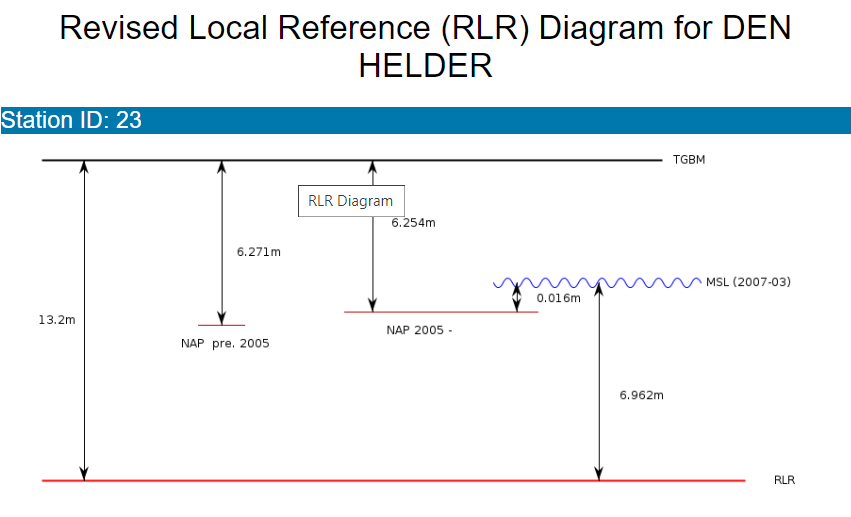

In [310]:
#Add 6.929m to data values 1865-2004 to refer to RLR
#Add 6.946m to data values 2005 onwards to refer to RLR
df.loc[(df['decimal date'] >= 1865) & (df['decimal date'] <= 2004), 'msl_RLR (mm)'] = df.loc[(df['decimal date'] >= 1865) & (df['decimal date'] <= 2004), 'mean_sea_level (mm)'] + 6.929*1000
df.loc[df['decimal date'] >= 2004, 'msl_RLR (mm)'] = df.loc[df['decimal date'] >= 2004, 'mean_sea_level (mm)'] + 6.946*1000
#df = df.drop(['year', 'month','missing_days', 'flag'], axis=1)
df


,date,mean_sea_level (mm),missing_days,flag,decimal date,year,month,msl_RLR (mm)
0,January-1865,6814,0,0,1865.0417,1865,January,13743.0
1,February-1865,6589,0,0,1865.1250,1865,February,13518.0
2,February-1865,6519,0,0,1865.2083,1865,February,13448.0
3,April-1865,6529,0,0,1865.2917,1865,April,13458.0
4,May-1865,6679,0,0,1865.3750,1865,May,13608.0
...,...,...,...,...,...,...,...,...
1879,August-2021,7004,0,0,2021.6250,2021,August,13950.0
1880,August-2021,6987,0,0,2021.7083,2021,August,13933.0
1881,October-2021,7139,0,0,2021.7917,2021,October,14085.0
1882,November-2021,7141,0,0,2021.8750,2021,November,14087.0


# 3. Compute mean sea level from RLR using the whole dataset.


In [311]:
ABSOLUTE_msl_RLR = df["msl_RLR (mm)"].mean()
print("absolute msl from RLR USING whole dataset :" ,ABSOLUTE_msl_RLR, "mm")

absolute msl from RLR USING whole dataset : 13777.65498938429 mm


# 4. You will notice that the original dataset has some data gaps. Choose the longest part of the data which has continuous values without any missing values and compute the mean sea level from it.

In [312]:
#code to find the longest continuous values in the dataset
missing_i = df[df['mean_sea_level (mm)'] == -99999].index.tolist()
print("the list of missing value index:",missing_i)
n = len(missing_i)
N = len(df["mean_sea_level (mm)"])
print("length of whole dataset:",N)
# diving the search for longest continuous range in 3 parts, both the extreme and the middle
if n==0:                # if no missing values
    r = [0,N-1]
    print("starting and ending index for longest continuous data: ", r , "WHOLE DATASET IS CONTINUOUS")
else:
    l_c_f = index[0]      #storing the index of first missing value
    l_c_l = N-1 - index[n-1]  # storing the index of last missing value
    l_c_m = []           # list for storing the length of in between continuous ranges)
    i_r = []               #list for storing the start and ending index of the continuous ranges in between
    for i in range(0,n-1):
        l = index[i+1]-index[i]     # finding length of all continuous ranges
        s = index[i]             #storing start index
        e = index[i+1]            # storing end
        l_c_m.append(l)          
        i_r.append([s,e])
    import numpy as np
    if len(l_c_m) > 0:                    #if there was any continuous range in between except the extreme ranges
        m = np.max(l_c_m)            # find max of in between ranges
        i_m =l_c_m.index(m)          #find the index of lngest range
        range_m = i_r[i_m]           # store the corresponding start and end date of maximum range
        if (l_c_l > m) and (l_c_l > l_c_f):
            r = [index[n-1]+1,N-1]                #chekcing for longest continous for all 3 ranges
        elif (l_c_f > m) and (l_c_f > l_c_l):
            r = [0,index[0]-1]
        elif (m >l_c_f ) and (m > l_c_l):
            r = range_m
    else:
        if l_c_f > l_c_l:                       # checking between both extremes
            r = [0,index[0]-1]
        else:
            r = [index[n-1]+1,N-1]
    start_end = r
    print("starting and ending index for longest continuous data: ", start_end)
#r   #range of continuous in form of index
# there is no missing value therefore  data has no gaps and hence the whole dataset is continuous and the longest part
print("mean sea level of longest data will be same as that of whole dataset which is :", ABSOLUTE_msl_RLR)

the list of missing value index: []
length of whole dataset: 1884
starting and ending index for longest continuous data:  [0, 1883] WHOLE DATASET IS CONTINUOUS
mean sea level of longest data will be same as that of whole dataset which is : 13777.65498938429


# 5. Compare results obtained from both methods. Why is there a difference in both results?

In [313]:
'''both resultsin this case are same as there is no missing data 

but there can be a difference in both results because of the presence of missing values in the whole dataset.
in the mean sea level calcluated using the whole dataset, the missing values are not taken into  consideration, which 
results in different mean values which are not exact and for the mean sea level of  the longest continuous data the exact 
data points are used for a relatively short interval giving  more accurate value of the mean sea level for that 
particular interval'''

'both resultsin this case are same as there is no missing data \n\nbut there can be a difference in both results because of the presence of missing values in the whole dataset.\nin the mean sea level calcluated using the whole dataset, the missing values are not taken into  consideration, which \nresults in different mean values which are not exact and for the mean sea level of  the longest continuous data the exact \ndata points are used for a relatively short interval giving  more accurate value of the mean sea level for that \nparticular interval'

# 6. Find anomaly for both datasets by subtracting mean sea level values for each dataset.

In [314]:
#anomaly = mean sea  level _rlr - mean of all data
df["anomaly_mean"] = df["msl_RLR (mm)"]  - ABSOLUTE_msl_RLR
df

,date,mean_sea_level (mm),missing_days,flag,decimal date,year,month,msl_RLR (mm),anomaly_mean
0,January-1865,6814,0,0,1865.0417,1865,January,13743.0,-34.654989
1,February-1865,6589,0,0,1865.1250,1865,February,13518.0,-259.654989
2,February-1865,6519,0,0,1865.2083,1865,February,13448.0,-329.654989
3,April-1865,6529,0,0,1865.2917,1865,April,13458.0,-319.654989
4,May-1865,6679,0,0,1865.3750,1865,May,13608.0,-169.654989
...,...,...,...,...,...,...,...,...,...
1879,August-2021,7004,0,0,2021.6250,2021,August,13950.0,172.345011
1880,August-2021,6987,0,0,2021.7083,2021,August,13933.0,155.345011
1881,October-2021,7139,0,0,2021.7917,2021,October,14085.0,307.345011
1882,November-2021,7141,0,0,2021.8750,2021,November,14087.0,309.345011


# 7. Plot time series for anomaly value for both datasets

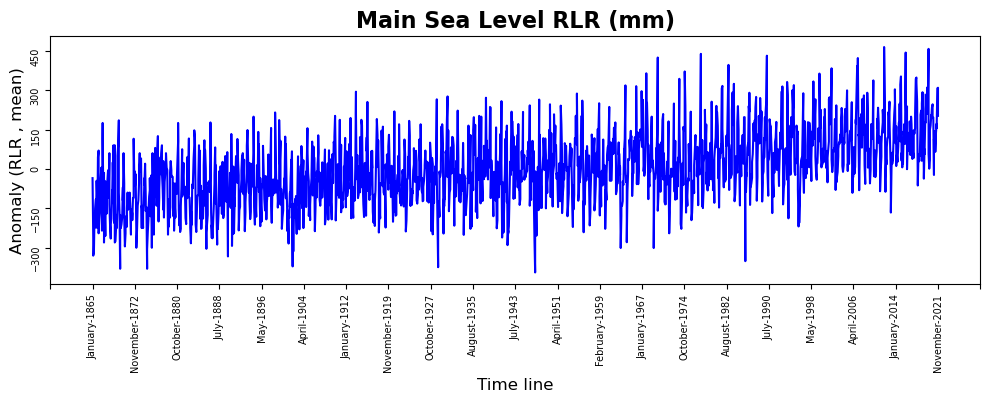

In [315]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as ticker
figures['rlr_a'], ax = plt.subplots(figsize=(12, 4), linewidth=0.00001)
ax.plot(df["date"], df["anomaly_mean"], c='blue')
ax.set_title('Main Sea Level RLR (mm)', fontsize=16, weight = "bold")
ax.set_xlabel('Time line', fontsize=12)
ax.set_ylabel('Anomaly (RLR , mean)', fontsize=12)
ax.tick_params(rotation = 90, labelsize=7)
ax.xaxis.set_major_locator(ticker.LinearLocator(23))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))
ax.set_aspect(aspect=0.39)
#plt.savefig(r"C:\Users\Sahil Agrawal\Desktop\sem-2\eg\lab-03\anomaly(direct).pdf",dpi =2000)
plt.show()

# 8. Compute mean, median, mode, standard deviation and variance for both datasets.

In [316]:
mean = df["msl_RLR (mm)"].mean()
median = df["msl_RLR (mm)"].median()
std = df["msl_RLR (mm)"].std()
variance = df["msl_RLR (mm)"].var()
print("for main sea level from RLR"
      "\n           mean = " ,mean,"mm","\n         median =",median,"mm","\n std. deviation =",std,"mm","\n       variance =",variance)

for main sea level from RLR
           mean =  13777.65498938429 mm 
         median = 13768.0 mm 
 std. deviation = 134.97535374853868 mm 
       variance = 18218.346119543156


# 9. Seasonal adjustment – Compute the climatology of the RLR referenced data and remove it from the time series to compute anomalies

In [317]:
#creating column for month number
df['month_number'] = range(1, len(df)+1)

#seasonal adjustment
df


,date,mean_sea_level (mm),missing_days,flag,decimal date,year,month,msl_RLR (mm),anomaly_mean,month_number
0,January-1865,6814,0,0,1865.0417,1865,January,13743.0,-34.654989,1
1,February-1865,6589,0,0,1865.1250,1865,February,13518.0,-259.654989,2
2,February-1865,6519,0,0,1865.2083,1865,February,13448.0,-329.654989,3
3,April-1865,6529,0,0,1865.2917,1865,April,13458.0,-319.654989,4
4,May-1865,6679,0,0,1865.3750,1865,May,13608.0,-169.654989,5
...,...,...,...,...,...,...,...,...,...,...
1879,August-2021,7004,0,0,2021.6250,2021,August,13950.0,172.345011,1880
1880,August-2021,6987,0,0,2021.7083,2021,August,13933.0,155.345011,1881
1881,October-2021,7139,0,0,2021.7917,2021,October,14085.0,307.345011,1882
1882,November-2021,7141,0,0,2021.8750,2021,November,14087.0,309.345011,1883


In [318]:
import numpy as np   #FORMING A MATRIX OF DESGIN AND SOMVING BY LEAST SQUARE BY SOLVING NORMAL EUQATION BY INVERSE METHIOD
t = df["month_number"]
A = np.zeros((len(df), 6))
A[:, 0] = 1
A[:, 1] = t
A[:, 2] = np.cos(np.pi/6 * t)
A[:, 3] = np.sin(np.pi/6 * t)
A[:, 4] = np.cos(np.pi/3 * t)
A[:, 5] = np.sin(np.pi/3 * t)
y = df["msl_RLR (mm)"]
#solving the normal equations 
ATA = np.dot(A.T,A)                         # IVNERSE OF 1884 ROW  MATRIX THAT ALSO RECTANGULAR IS HARD FOR COMPUTING
ATA_inv = np.linalg.inv(ATA)               # INVERSEING THE SQUARE MATRIX
h = np.dot(np.dot(ATA_inv, A.T),  y)
h

array([ 1.36535705e+04,  1.31654594e-01,  6.25830918e+01, -6.73245863e+01,
        1.36947785e+01,  3.36392698e+00])

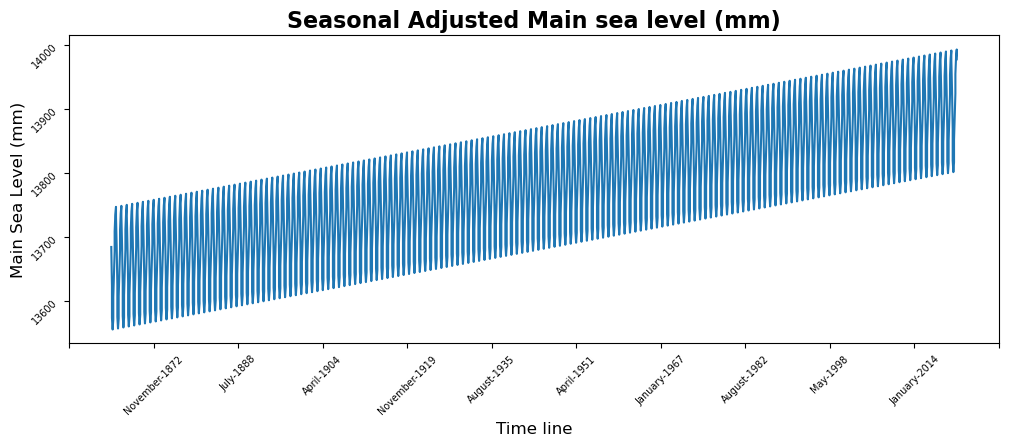

In [319]:
s_ad = h[0] + h[1]*t + h[2]*np.cos(np.pi/6 * t) + h[3]*np.sin(np.pi/6 * t) + h[4]*np.cos(np.pi/3 * t) + h[5]*np.sin(np.pi/3 * t)
#plt.plot(t,s_ad)
figures['seasonal_adj_msl'], ax = plt.subplots(figsize=(12, 4), linewidth=0.00001)
#ax.plot(t,df["anomaly_mean"], c='blue')
ax.plot(df["date"],s_ad)
#ax.scatter(t,s_ad-ABSOLUTE_msl_RLR, s=2)
ax.set_title('Seasonal Adjusted Main sea level (mm)', fontsize=16, weight = "bold")
ax.set_xlabel('Time line', fontsize=12)
ax.set_ylabel('Main Sea Level (mm)', fontsize=12)
ax.xaxis.set_major_locator(ticker.LinearLocator(12))
ax.tick_params(rotation = 45, labelsize=7)
plt.show()
#s_ad

In [320]:
season_adj = np.dot(A,h)
df['seasonal_adj'] = season_adj    # DROPPING UNCESSARY COLUMNS
df['Anomaly_s_adj'] = df['msl_RLR (mm)'] - df['seasonal_adj']
#df = df.drop(columns=['month','missing_days','year'],axis = 1)
#df = df.drop(columns = ['flag'])
df

,date,mean_sea_level (mm),missing_days,flag,decimal date,year,month,msl_RLR (mm),anomaly_mean,month_number,seasonal_adj,Anomaly_s_adj
0,January-1865,6814,0,0,1865.0417,1865,January,13743.0,-34.654989,1,13683.999079,59.000921
1,February-1865,6589,0,0,1865.1250,1865,February,13518.0,-259.654989,2,13622.886444,-104.886444
2,February-1865,6519,0,0,1865.2083,1865,February,13448.0,-329.654989,3,13572.946133,-124.946133
3,April-1865,6529,0,0,1865.2917,1865,April,13458.0,-319.654989,4,13554.740169,-96.740169
4,May-1865,6679,0,0,1865.3750,1865,May,13608.0,-169.654989,5,13570.302110,37.697890
...,...,...,...,...,...,...,...,...,...,...,...,...
1879,August-2021,7004,0,0,2021.6250,2021,August,13950.0,172.345011,1880,13924.160285,25.839715
1880,August-2021,6987,0,0,2021.7083,2021,August,13933.0,155.345011,1881,13954.842634,-21.842634
1881,October-2021,7139,0,0,2021.7917,2021,October,14085.0,307.345011,1882,13981.180193,103.819807
1882,November-2021,7141,0,0,2021.8750,2021,November,14087.0,309.345011,1883,13993.271119,93.728881


# ploting the seasonal adjusted anomalies

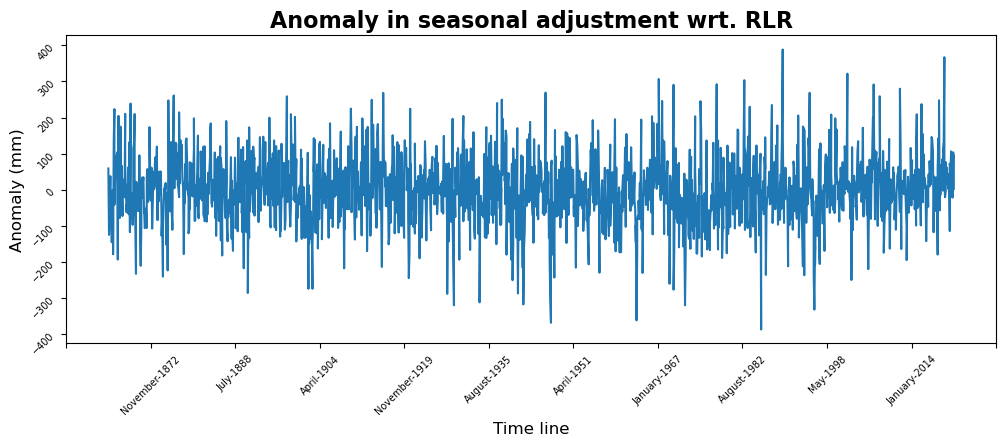

In [321]:
figures['seasonal_adj_a'], ax = plt.subplots(figsize=(12, 4), linewidth=0.00001)
#ax.plot(t,df["anomaly_mean"], c='blue')
ax.plot(df["date"],df['Anomaly_s_adj'])
#ax.scatter(t,s_ad-ABSOLUTE_msl_RLR, s=2)
ax.set_title('Anomaly in seasonal adjustment wrt. RLR', fontsize=16, weight = "bold")
ax.set_xlabel('Time line', fontsize=12)
ax.set_ylabel('Anomaly (mm)', fontsize=12)
ax.xaxis.set_major_locator(ticker.LinearLocator(12))
ax.tick_params(rotation = 45, labelsize=7)
plt.show()

# 10. Apply 3σ test and 6MAD (median absolute deviation) test on the anomaly from seasonal adjusted data and anomaly from continuous data to check for outliers.

## 3 sigma test 

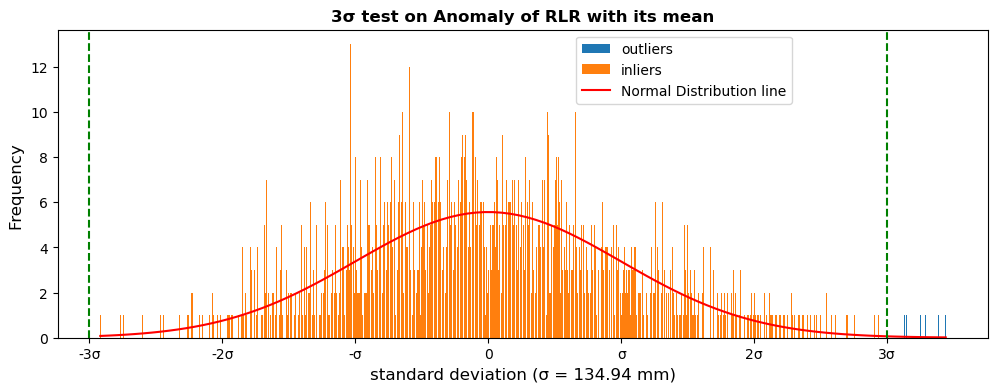

7 outlieres found by 3σ test of anamoly of RLR from its mean


1258    424.345011
1354    438.345011
1501    431.345011
1704    422.345011
1763    464.345011
1810    443.345011
1861    457.345011
Name: anomaly_mean, dtype: float64

In [322]:
from scipy.stats import norm

# Calculate mean and standard deviation of the anomaly_mean
mean_rlr = np.mean(df['anomaly_mean'])
std_rlr = np.std(df['anomaly_mean'])

#outliers and inlieres SEPERATING THE RANGE
df_i = df[np.abs(df['anomaly_mean'] - mean_rlr) <= 3 * std_rlr]
df_o = df[np.abs(df['anomaly_mean'] - mean_rlr) > 3 * std_rlr]

figures['3sigma_rlr'] = plt.figure(figsize=(12,4))

# Plot the histogram of the anomaly_mean data
plt.hist(df_o['anomaly_mean'], bins=50, alpha=1, label = "outliers")
plt.hist(df_i['anomaly_mean'], bins=1000, alpha=1, label = "inliers")

#ploting normal dostribution
x = np.linspace(np.min(df['anomaly_mean']), np.max(df['anomaly_mean']), 100)   #x range
pdf = norm.pdf(x, mean_rlr, std_rlr)                                           #density function 
#for frequency
f = pdf*len(df)
plt.plot(x, f, 'r', label='Normal Distribution line')
#vartical lines
plt.axvline(mean_rlr-3*std_rlr, color='green', linestyle='--')
plt.axvline(mean_rlr+3*std_rlr, color='green', linestyle='--')
plt.xticks([mean_rlr-3*std_rlr,mean_rlr-2*std_rlr,mean_rlr-std_rlr,0,mean_rlr+1*std_rlr,mean_rlr+2*std_rlr,
            mean_rlr+3*std_rlr], ["-3σ","-2σ","-σ","0","σ","2σ","3σ"])
plt.xlabel('standard deviation (σ = {} mm)'.format(round(std_rlr,2)), fontsize=12)
plt.ylabel('Frequency ', fontsize=12)
plt.title('3σ test on Anomaly of RLR with its mean', weight = "bold")
plt.legend(bbox_to_anchor=(0.55, 1), loc='upper left')
plt.show()
outliers_rlr_3σ = df_o['anomaly_mean'] 
print(len(df_o) ,"outlieres found by 3σ test of anamoly of RLR from its mean")
outliers_rlr_3σ

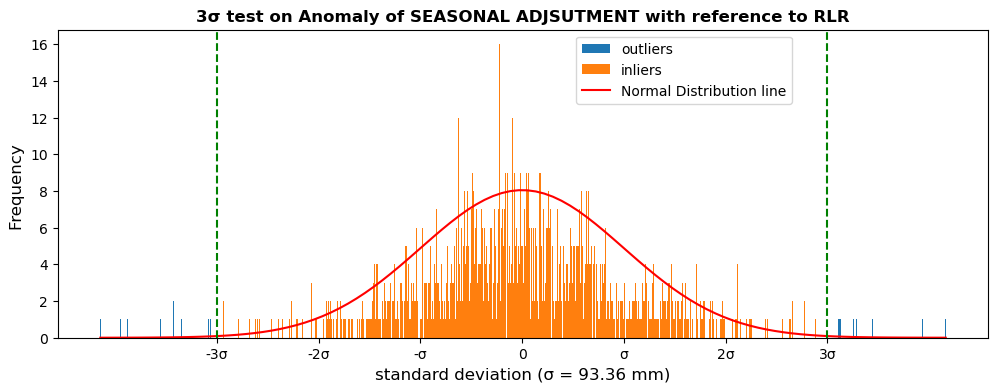

20 outlieres found from 3σ test of seasonal adjusted data


311    -285.924638
755    -288.379278
769    -319.997173
827    -311.858409
912    -287.068068
924    -317.647924
984    -307.547199
985    -368.434565
1176   -361.824881
1226    306.908643
1258    290.881348
1284   -320.043578
1354    292.242507
1416    303.578016
1453   -387.048915
1501    388.631664
1572   -331.960101
1645    321.673403
1704    291.661493
1861    367.236011
Name: Anomaly_s_adj, dtype: float64

In [323]:
from scipy.stats import norm

# Calculate mean and standard deviation of the anomaly_mean
mean_s_adj = np.mean(df['Anomaly_s_adj'])
std_s_adj  = np.std(df['Anomaly_s_adj'])

#outliers and inlieres
df_i = df[np.abs(df['Anomaly_s_adj'] - mean_s_adj) <= 3 * std_s_adj]
df_o = df[np.abs(df['Anomaly_s_adj'] - mean_s_adj) > 3 * std_s_adj]

figures['3sigma_adj'] = plt.figure(figsize=(12, 4))

# Plot the histogram of the anomaly_mean data
plt.hist(df_o['Anomaly_s_adj'], bins=1000, alpha=1, label = "outliers")
plt.hist(df_i['Anomaly_s_adj'], bins=1000, alpha=1, label = "inliers")

#ploting normal dostribution
x = np.linspace(np.min(df['Anomaly_s_adj']), np.max(df['Anomaly_s_adj']), 100)   #x range
pdf = norm.pdf(x, mean_s_adj, std_s_adj)                                           #density function FOR PLOTING THE NORMAL FUNCTION
#for frequency
f = pdf*len(df)
plt.plot(x, f, 'r', label='Normal Distribution line')
#vartical lines
plt.axvline(mean_s_adj-3*std_s_adj, color='green', linestyle='--')
plt.axvline(mean_s_adj+3*std_s_adj, color='green', linestyle='--')
plt.xticks([mean_s_adj-3*std_s_adj,mean_s_adj-2*std_s_adj,mean_s_adj-std_s_adj,0,mean_s_adj+1*std_s_adj,mean_s_adj+2*std_s_adj,
            mean_s_adj+3*std_s_adj], ["-3σ","-2σ","-σ","0","σ","2σ","3σ"])
plt.xlabel('standard deviation (σ = {} mm)'.format(round(std_s_adj,2)), fontsize=12)
plt.ylabel('Frequency ', fontsize=12)
plt.title('3σ test on Anomaly of SEASONAL ADJSUTMENT with reference to RLR', weight = "bold")
plt.legend(bbox_to_anchor=(0.55, 1), loc='upper left')
plt.show()
outliers_s_adj_3σ = df_o['Anomaly_s_adj'] 
print(len(df_o) ,"outlieres found from 3σ test of seasonal adjusted data")
outliers_s_adj_3σ


# 6MAD (median absolute deviation) test

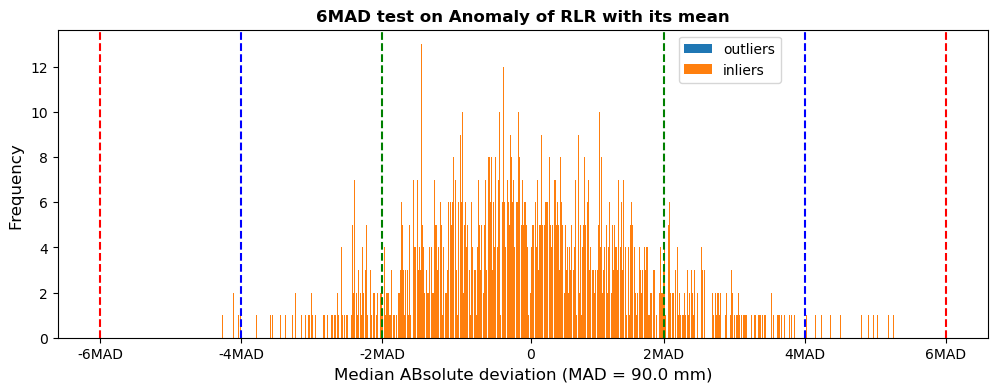

0 outlieres found fROM 6MAD test of anamoly of RlR from its mean


Series([], Name: anomaly_mean, dtype: float64)

In [324]:
# Calculate median of the anomaly_mean
median_rlr = np.median(df['anomaly_mean'])
MAD_rlr = np.median(np.abs(df['anomaly_mean'] - median_rlr))
#print((np.abs(df['anomaly_mean'] - median_rlr)[0]))
#print(MAD_rlr)
#outliers and inlieres
figures['6mad_rlr'] = plt.figure(figsize=(12, 4))

df_I = df[np.abs(df['anomaly_mean'] - median_rlr) <= 6* MAD_rlr]
df_O = df[np.abs(df['anomaly_mean'] - median_rlr) > 6* MAD_rlr]
plt.hist(df_O['anomaly_mean'], bins=1000, alpha=1, label = "outliers")  #PLOTING HISTOGRAM
plt.hist(df_I['anomaly_mean'], bins=1000, alpha=1, label = "inliers")    # PLOTING VERTICAL LINES
plt.axvline(median_rlr-6*MAD_rlr, color='red', linestyle='--')
plt.axvline(median_rlr+6*MAD_rlr, color='red', linestyle='--')
plt.axvline(median_rlr-4*MAD_rlr, color='blue', linestyle='--')
plt.axvline(median_rlr+4*MAD_rlr, color='blue', linestyle='--')
plt.axvline(median_rlr-2*MAD_rlr, color='green', linestyle='--')
plt.axvline(median_rlr+2*MAD_rlr, color='green', linestyle='--')
plt.xticks([median_rlr-6*MAD_rlr,median_rlr-4*MAD_rlr,median_rlr-2*MAD_rlr,0,median_rlr+2*MAD_rlr,median_rlr+4*MAD_rlr,
            median_rlr+6*MAD_rlr], ["-6MAD","-4MAD","-2MAD","0","2MAD","4MAD","6MAD"])    # FIXING THE TICKS
plt.xlabel('Median ABsolute deviation (MAD = {} mm)'.format(round(MAD_rlr,2)), fontsize=12)
plt.ylabel('Frequency ', fontsize=12)
plt.title('6MAD test on Anomaly of RLR with its mean', weight = "bold")
plt.legend(bbox_to_anchor=(0.66, 1), loc='upper left')
plt.show()
outliers_rlr_6MAD = df_O['anomaly_mean'] 
print(len(df_O) ,"outlieres found fROM 6MAD test of anamoly of RlR from its mean")
outliers_rlr_6MAD

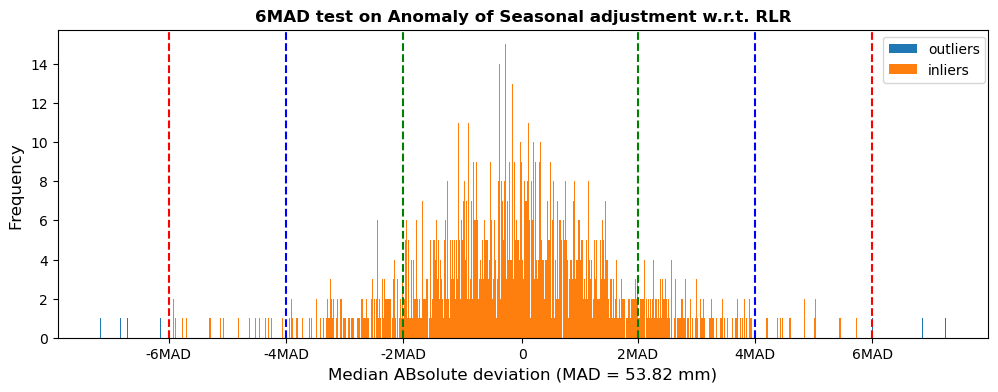

7 outlieres found fROM 6MAD test of seasonal adjusted data


985    -368.434565
1176   -361.824881
1453   -387.048915
1501    388.631664
1572   -331.960101
1645    321.673403
1861    367.236011
Name: Anomaly_s_adj, dtype: float64

In [325]:
#MAD(n) = MED(|Yi − MED(n)|, i = 1,...,n).

# Calculate median of the anomaly_mean
median_s_adj = np.median(df['Anomaly_s_adj'])
MAD_s_adj = np.median(np.abs(df['Anomaly_s_adj'] - median_s_adj))
#print((np.abs(df['anomaly_mean'] - median_s_adj)[0]))
#print(MAD_s_adj)
#outliers and inlieres
figures['6mad_adj'] = plt.figure(figsize=(12, 4))

df_I = df[np.abs(df['Anomaly_s_adj'] - median_s_adj) <= 6* MAD_s_adj]
df_O = df[np.abs(df['Anomaly_s_adj'] - median_s_adj) > 6* MAD_s_adj]
plt.hist(df_O['Anomaly_s_adj'], bins=1000, alpha=1, label = "outliers")
plt.hist(df_I['Anomaly_s_adj'], bins=1000, alpha=1, label = "inliers")
plt.axvline(median_s_adj-6*MAD_s_adj, color='red', linestyle='--')
plt.axvline(median_s_adj+6*MAD_s_adj, color='red', linestyle='--')
plt.axvline(median_s_adj-4*MAD_s_adj, color='blue', linestyle='--')
plt.axvline(median_s_adj+4*MAD_s_adj, color='blue', linestyle='--')
plt.axvline(median_s_adj-2*MAD_s_adj, color='green', linestyle='--')
plt.axvline(median_s_adj+2*MAD_s_adj, color='green', linestyle='--')
plt.xticks([median_s_adj-6*MAD_s_adj,median_s_adj-4*MAD_s_adj,median_s_adj-2*MAD_s_adj,0,median_s_adj+2*MAD_s_adj,median_s_adj+4*MAD_s_adj,
            median_s_adj+6*MAD_s_adj], ["-6MAD","-4MAD","-2MAD","0","2MAD","4MAD","6MAD"])
plt.xlabel('Median ABsolute deviation (MAD = {} mm)'.format(round(MAD_s_adj,2)), fontsize=12)
plt.ylabel('Frequency ', fontsize=12)
plt.title('6MAD test on Anomaly of Seasonal adjustment w.r.t. RLR', weight = "bold")
plt.legend(bbox_to_anchor=(0.88, 1), loc='upper left')
plt.show()
outliers_s_adj_6MAD = df_O['Anomaly_s_adj'] 
print(len(df_O) ,"outlieres found fROM 6MAD test of seasonal adjusted data")
outliers_s_adj_6MAD

In [326]:
df

,date,mean_sea_level (mm),missing_days,flag,decimal date,year,month,msl_RLR (mm),anomaly_mean,month_number,seasonal_adj,Anomaly_s_adj
0,January-1865,6814,0,0,1865.0417,1865,January,13743.0,-34.654989,1,13683.999079,59.000921
1,February-1865,6589,0,0,1865.1250,1865,February,13518.0,-259.654989,2,13622.886444,-104.886444
2,February-1865,6519,0,0,1865.2083,1865,February,13448.0,-329.654989,3,13572.946133,-124.946133
3,April-1865,6529,0,0,1865.2917,1865,April,13458.0,-319.654989,4,13554.740169,-96.740169
4,May-1865,6679,0,0,1865.3750,1865,May,13608.0,-169.654989,5,13570.302110,37.697890
...,...,...,...,...,...,...,...,...,...,...,...,...
1879,August-2021,7004,0,0,2021.6250,2021,August,13950.0,172.345011,1880,13924.160285,25.839715
1880,August-2021,6987,0,0,2021.7083,2021,August,13933.0,155.345011,1881,13954.842634,-21.842634
1881,October-2021,7139,0,0,2021.7917,2021,October,14085.0,307.345011,1882,13981.180193,103.819807
1882,November-2021,7141,0,0,2021.8750,2021,November,14087.0,309.345011,1883,13993.271119,93.728881


# 11. Find trends in the data by fitting a linear line Y = AX + B for all three anomaly datasets.

In [327]:
# i have only 2 anomalies as my data was continuous

In [328]:
t = df["month_number"]
A1 = np.zeros((len(df), 2))
A1[:, 0] = 1                     # DESIGN MATRIX FOR TREND
A1[:, 1] = t
y1 = df["anomaly_mean"]
y2 = df["Anomaly_s_adj"]
#solving the normal equations 
ATA1 = np.dot(A1.T,A1)
ATA_inv1 = np.linalg.inv(ATA1)
h1 = np.dot(np.dot(ATA_inv1, A1.T),  y1)
h2 = np.dot(np.dot(ATA_inv1, A1.T),  y2)
trend1 = np.dot(A1,h1)
trend2 = np.dot(A1,h2)
h2

array([ 5.12789811e-12, -1.51263550e-14])

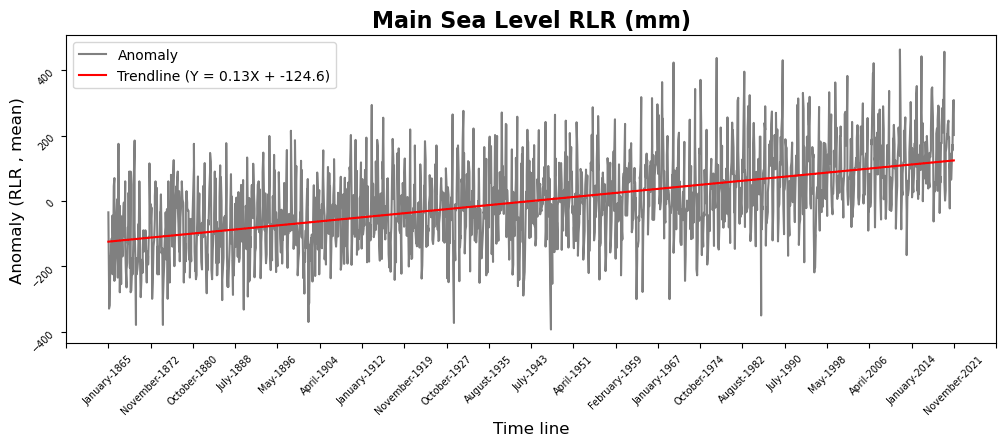

In [329]:
figures['trend_rlr'], ax = plt.subplots(figsize=(12, 4), linewidth=0.00001)
ax.plot(df["date"],df["anomaly_mean"], c='gray', label = 'Anomaly')
ax.plot(df["date"],trend1,c = 'red', label ='Trendline (Y = {}X + {})'.format(round(h1[1],2),round(h1[0],2)))
#ax.scatter(t,s_ad-ABSOLUTE_msl_RLR, s=2)
ax.set_title('Main Sea Level RLR (mm)', fontsize=16, weight = "bold")
ax.set_xlabel('Time line', fontsize=12)
ax.set_ylabel('Anomaly (RLR , mean)', fontsize=12)
ax.xaxis.set_major_locator(ticker.LinearLocator(23))
ax.tick_params(rotation = 45, labelsize=7)
plt.legend()
plt.show()

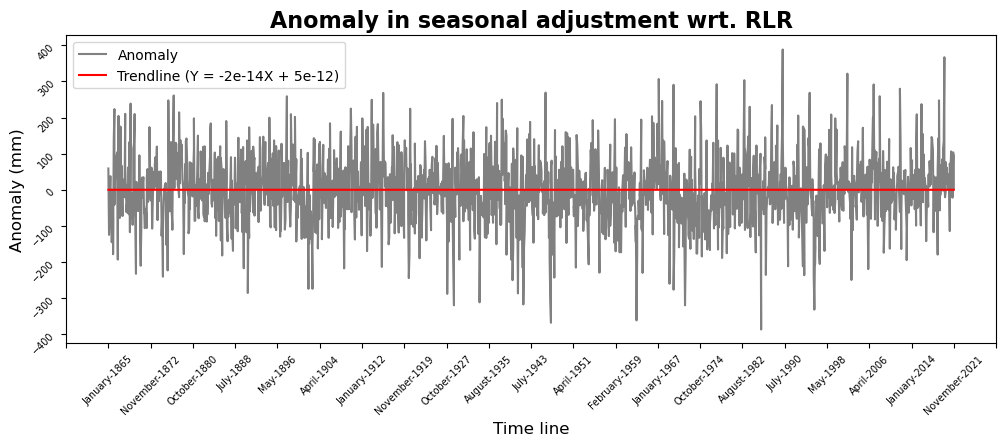

In [330]:
figures['trend_adj'], ax = plt.subplots(figsize=(12, 4), linewidth=0.00001)
ax.plot(df["date"],df["Anomaly_s_adj"], c='gray', label = 'Anomaly')
ax.plot(df["date"],trend2, c='red',label ='Trendline (Y = {}X + {})'.format(round(h2[1],14),round(h2[0],12)))
ax.set_title('Anomaly in seasonal adjustment wrt. RLR', fontsize=16, weight = "bold")
ax.set_xlabel('Time line', fontsize=12)
ax.set_ylabel('Anomaly (mm)', fontsize=12)
ax.xaxis.set_major_locator(ticker.LinearLocator(23))
ax.tick_params(rotation = 45, labelsize=7)
plt.legend()
plt.show()

# 12. Compute the trend in mean sea level from the anomalies. Compare your result with the global mean sea level trend.


In [331]:
trend_rlr_wrt_mean = h1[1]
trend_seasonaladj_wrt_rlr = h2[1]
print("trend of the anomaly of global sea level = {}".format(h1[1]))
print("trend of the anomaly seasonal adjusted sea level = {}".format(h2[1]))
'''trend of global mean is positive which shows increase in the global mean sea level, whereas in seasonal adjussted dataset the trend is negative and close to zero as the effect of increase trend was taken while adjsuting the data seasonally succh that the anomaly from were minimized by usnig least sqaure method.'''

trend of the anomaly of global sea level = 0.1321984131285893
trend of the anomaly seasonal adjusted sea level = -1.5126355029648764e-14


'trend of global mean is positive which shows increase in the global mean sea level, whereas in seasonal adjussted dataset the trend is negative and close to zero as the effect of increase trend was taken while adjsuting the data seasonally succh that the anomaly from were minimized by usnig least sqaure method.'

In [332]:
df

,date,mean_sea_level (mm),missing_days,flag,decimal date,year,month,msl_RLR (mm),anomaly_mean,month_number,seasonal_adj,Anomaly_s_adj
0,January-1865,6814,0,0,1865.0417,1865,January,13743.0,-34.654989,1,13683.999079,59.000921
1,February-1865,6589,0,0,1865.1250,1865,February,13518.0,-259.654989,2,13622.886444,-104.886444
2,February-1865,6519,0,0,1865.2083,1865,February,13448.0,-329.654989,3,13572.946133,-124.946133
3,April-1865,6529,0,0,1865.2917,1865,April,13458.0,-319.654989,4,13554.740169,-96.740169
4,May-1865,6679,0,0,1865.3750,1865,May,13608.0,-169.654989,5,13570.302110,37.697890
...,...,...,...,...,...,...,...,...,...,...,...,...
1879,August-2021,7004,0,0,2021.6250,2021,August,13950.0,172.345011,1880,13924.160285,25.839715
1880,August-2021,6987,0,0,2021.7083,2021,August,13933.0,155.345011,1881,13954.842634,-21.842634
1881,October-2021,7139,0,0,2021.7917,2021,October,14085.0,307.345011,1882,13981.180193,103.819807
1882,November-2021,7141,0,0,2021.8750,2021,November,14087.0,309.345011,1883,13993.271119,93.728881


# 13. Plot histogram, barplot and violin plot for seasonal adjusted anomaly data and anomaly data computed from continuous data in step 4. Comment on what difference you see after plotting diagrams for both datasets.


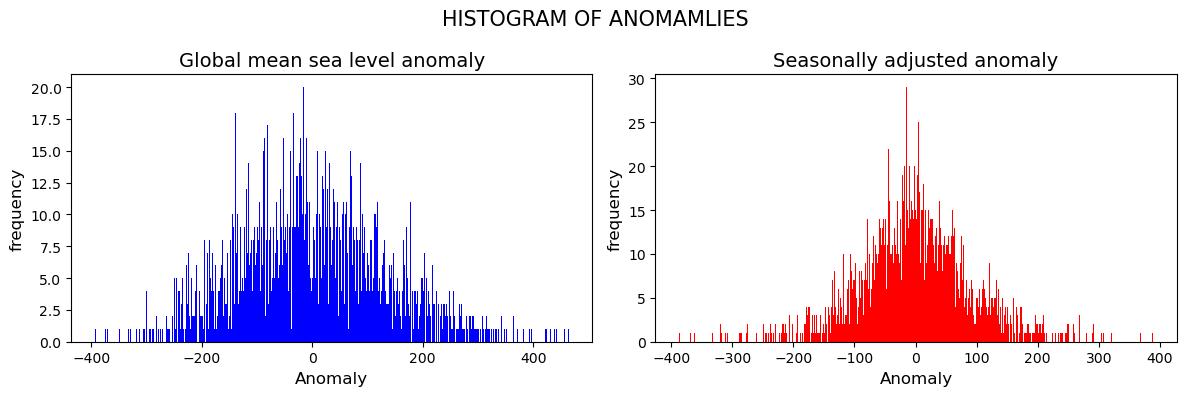

'histogram of global anomaly is left skewed and spreaded over 400 mm and more whereas seasonally adjusted anomaly is more normally distributed and ranges under 400 mm'

In [333]:
#histograms
figures['histogram'], axs = plt.subplots(1,2, figsize=(12,4))
figures['histogram'].subplots_adjust(hspace=1, wspace =1) # set height space
figures['histogram'].suptitle("HISTOGRAM OF ANOMAMLIES" , fontsize = 15)

# histogram plot for 'GLOBAL'
axs[0].hist(df['anomaly_mean'],bins= 500, color='blue')
axs[0].set_ylabel('frequency', fontsize=12)
axs[0].set_xlabel('Anomaly', fontsize=12)
axs[0].set_title('Global mean sea level anomaly', fontsize=14)


# histogram plot for 'SEASONAL ADJUSTMENT'
axs[1].hist(df['Anomaly_s_adj'],bins= 500, color='red')
axs[1].set_ylabel('frequency', fontsize=12)
axs[1].set_xlabel('Anomaly', fontsize=12)
axs[1].set_title('Seasonally adjusted anomaly', fontsize=14)
plt.tight_layout()
plt.show()
'''histogram of global anomaly is left skewed and spreaded over 400 mm and more whereas seasonally adjusted anomaly is more normally distributed and ranges under 400 mm'''

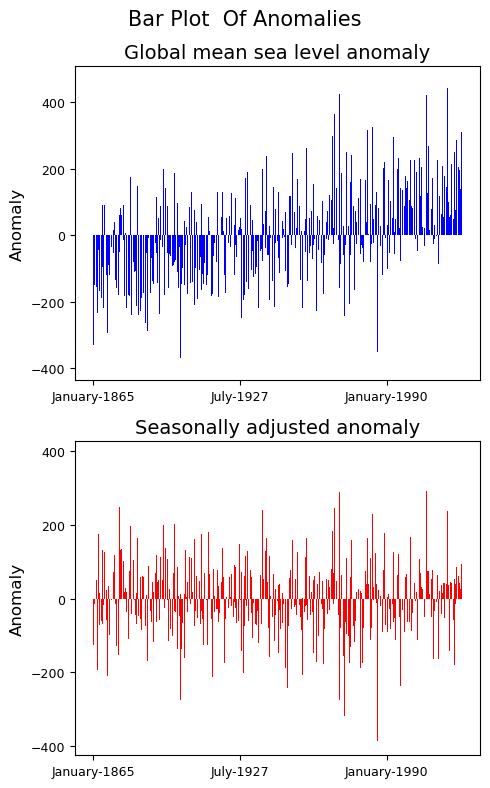

'both bar plots have high variations with seasonally adjusted anomaly having lesser peaks'

In [352]:
#BARPLOT
import matplotlib.ticker as ticker
figures['bar'], axs = plt.subplots(2,1, figsize=(5,8))
figures['bar'].subplots_adjust(hspace=1, wspace =1) # set height space
figures['bar'].suptitle("Bar Plot  Of Anomalies" , fontsize = 15)

# BAR plot for 'GLOBAL'
axs[0].bar(df['date'],df['anomaly_mean'], color='blue')
axs[0].set_ylabel('Anomaly', fontsize=12)
#axs[0].set_xlabel('frequency', fontsize=12)
axs[0].set_title('Global mean sea level anomaly', fontsize=14)
axs[0].tick_params(rotation = 0, labelsize=9)
axs[0].yaxis.set_major_locator(plt.MaxNLocator(5))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(3))

# BAR plot for 'SEASONAL ADJUSTMENT'
axs[1].bar(df['date'],df['Anomaly_s_adj'], color='red')
axs[1].set_ylabel('Anomaly', fontsize=12)
#axs[1].set_xlabel('frequency', fontsize=12)
axs[1].set_title('Seasonally adjusted anomaly', fontsize=14)
axs[1].tick_params(rotation = 0, labelsize=9)
axs[1].yaxis.set_major_locator(plt.MaxNLocator(5))
axs[1].xaxis.set_major_locator(plt.MaxNLocator(3))
plt.tight_layout()
plt.savefig(r"C:\Users\Sahil Agrawal\Desktop\sem-2\eg\lab-03\2.jpg",dpi =2000, bbox_inches='tight')
plt.show()
'''both bar plots have high variations with seasonally adjusted anomaly having lesser peaks'''

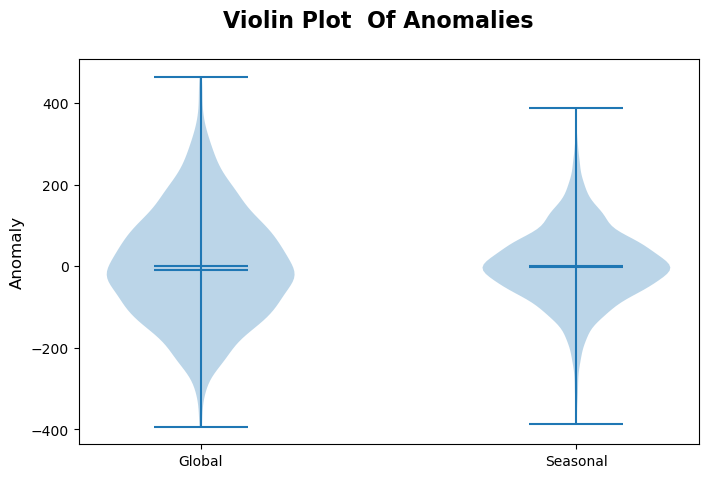

'violin plot for global having a larger horizontal size showing the frequency which corresponds the anomlay on y axis.. and mean and median are different in globa data set as we know from hostogram that the data in global is left skwewd making it differ in mean and median and for seasonally adjusted anomally mean and median are same'

In [336]:
#violin plot
import matplotlib.pyplot as plt

# create a figure and axis objects
figures['violin_plot'], ax = plt.subplots(1, 1, figsize=(8, 5))
figures['violin_plot'].suptitle("Violin Plot  Of Anomalies" , fontsize=16, weight = "bold")
# create a list of data arrays for each category
data = [df['anomaly_mean'], df['Anomaly_s_adj']]

# plot a single violin plot for both categories
ax.violinplot(data, showmeans=True, showmedians=True , showextrema= True)
ax.set_ylabel('Anomaly', fontsize=12)

# set tick labels for the x-axis
plt.setp(ax, xticks=[1, 2], xticklabels=['Global', 'Seasonal'])

# adjust the layout and show the plot
fig.subplots_adjust(wspace=0.4)
plt.show()

'''violin plot for global having a larger horizontal size showing the frequency which corresponds the anomlay on y axis.. and mean and median are different in globa data set as we know from hostogram that the data in global is left skwewd making it differ in mean and median and for seasonally adjusted anomally mean and median are same'''

# 14. Plot these lines on a single plot and see the difference in trend.


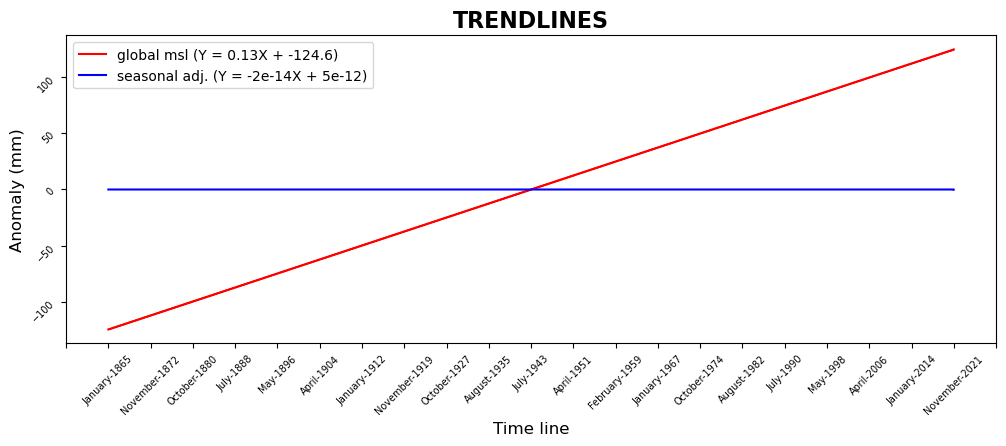

In [337]:
figures['trendlines'], ax = plt.subplots(figsize=(12, 4), linewidth=0.00001)
ax.set_title('TRENDLINES', fontsize=16, weight = "bold")
ax.plot(df["date"],trend1,c = 'red', label ='global msl (Y = {}X + {})'.format(round(h1[1],2),round(h1[0],2)))
ax.plot(df["date"],trend2, c="blue",label ='seasonal adj. (Y = {}X + {})'.format(round(h2[1],14),round(h2[0],12)))
ax.set_xlabel('Time line', fontsize=12)
ax.set_ylabel('Anomaly (mm)', fontsize=12)
ax.xaxis.set_major_locator(ticker.LinearLocator(23))
ax.tick_params(rotation = 45, labelsize=7)
plt.legend()
plt.show()


# 15. Perform 5-year moving average filtering on data and plot it.

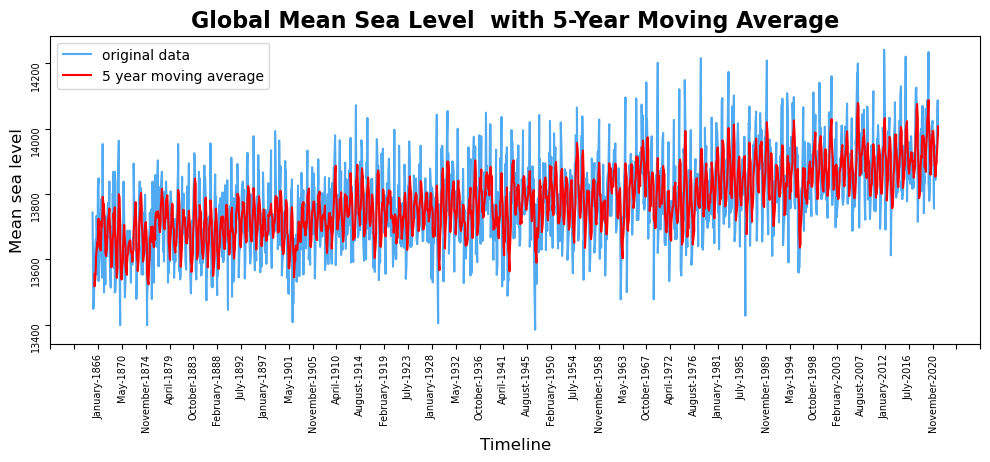

In [338]:
#moving average
# calculate the 5-year moving average using rolling method
rolling_mean = df['msl_RLR (mm)'].rolling(window=5).mean()  # mean data of before 5 years. 

# plot the original data and the rolling mean
figures['moving_avg'], ax = plt.subplots(figsize=(12, 4))
ax.plot(df['date'], df['msl_RLR (mm)'], label='original data', c = '#51abf2')
ax.plot(df["date"], rolling_mean, label='5 year moving average', c = "#f00")
ax.legend()
ax.set_xlabel('Timeline', fontsize=12)
ax.set_ylabel('Mean sea level', fontsize=12)
ax.set_title('Global Mean Sea Level  with 5-Year Moving Average', fontsize=16, weight = "bold")
ax.xaxis.set_major_locator(ticker.LinearLocator(40))
ax.tick_params(rotation = 90, labelsize=7)
#plt.savefig(r"C:\Users\Sahil Agrawal\Desktop\sem-2\eg\lab-03\1.jpg",dpi =2000)
plt.show()


# 16. Compute the Lomb-Scargle Periodogram. The lomb-Scargle periodogram is an algorithm for detecting and characterizing periodic signals in unevenly sampled data. You can use scipy library or astropy library to compute the LombScargle Periodogram.
# You can take help from given tutorials :
# i https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
# ii https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html

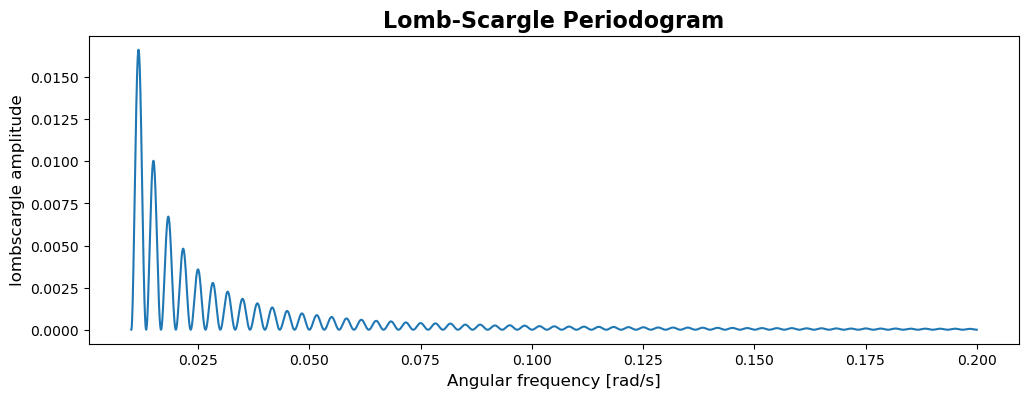

In [339]:
import scipy.signal as signal

t = df['month_number']  # assuming Month  is the time
mag = df['msl_RLR (mm)']            # MAGNITUDE OF DATA
w = np.linspace(0.01, 0.2, 10000)  #ffrequency range LINEARLY SPACED

pgram = signal.lombscargle(t, mag, w, normalize=True)   # USING LOMBSCRAGLE FUNCTION
# Plot the results
figures['lombscargle'], ax = plt.subplots(figsize=(12, 4))
ax.plot(w, pgram)
ax.set_title('Lomb-Scargle Periodogram', fontsize=16, weight = "bold")
ax.set_xlabel('Angular frequency [rad/s]', fontsize=12)
ax.set_ylabel('lombscargle amplitude', fontsize=12)
plt.show()

# You will get 100% bonus marks if you make an infographic for the tide gauge using the statistics and the data analysis you have performed.

In [340]:
figures   #printing the keys in dictionary

{'rlr_a': <Figure size 1200x400 with 1 Axes>,
 'seasonal_adj_msl': <Figure size 1200x400 with 1 Axes>,
 'seasonal_adj_a': <Figure size 1200x400 with 1 Axes>,
 '3sigma_rlr': <Figure size 1200x400 with 1 Axes>,
 '3sigma_adj': <Figure size 1200x400 with 1 Axes>,
 '6mad_rlr': <Figure size 1200x400 with 1 Axes>,
 '6mad_adj': <Figure size 1200x400 with 1 Axes>,
 'trend_rlr': <Figure size 1200x400 with 1 Axes>,
 'trend_adj': <Figure size 1200x400 with 1 Axes>,
 'histogram': <Figure size 1200x400 with 2 Axes>,
 'bar': <Figure size 1200x400 with 2 Axes>,
 'violin_plot': <Figure size 800x500 with 1 Axes>,
 'trendlines': <Figure size 1200x400 with 1 Axes>,
 'moving_avg': <Figure size 1200x400 with 1 Axes>,
 'lombscargle': <Figure size 1200x400 with 1 Axes>}

Figure name: rlr_a


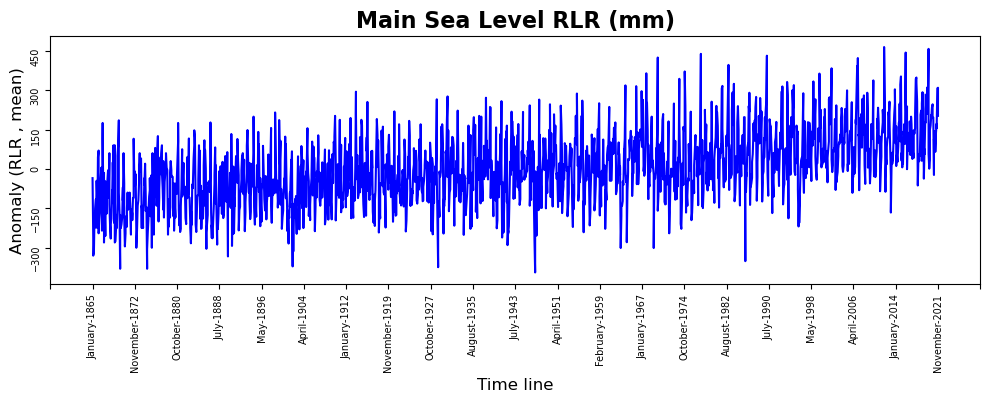

Figure name: seasonal_adj_msl


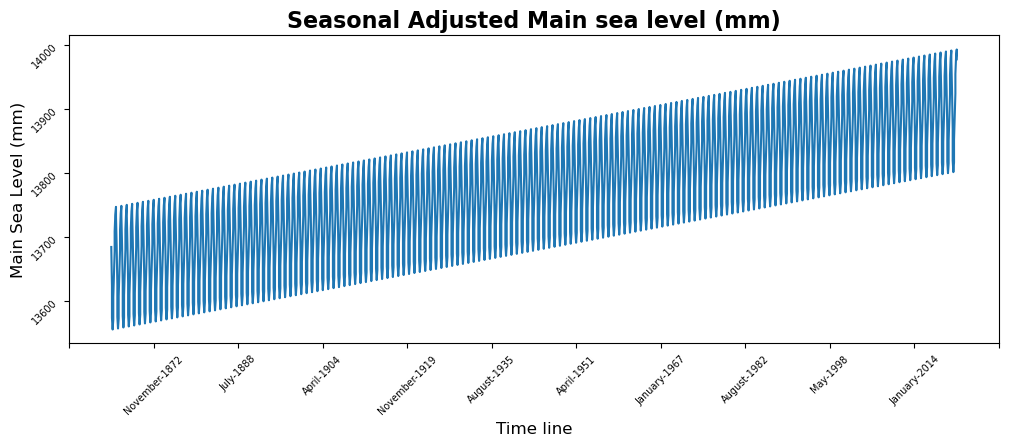

Figure name: seasonal_adj_a


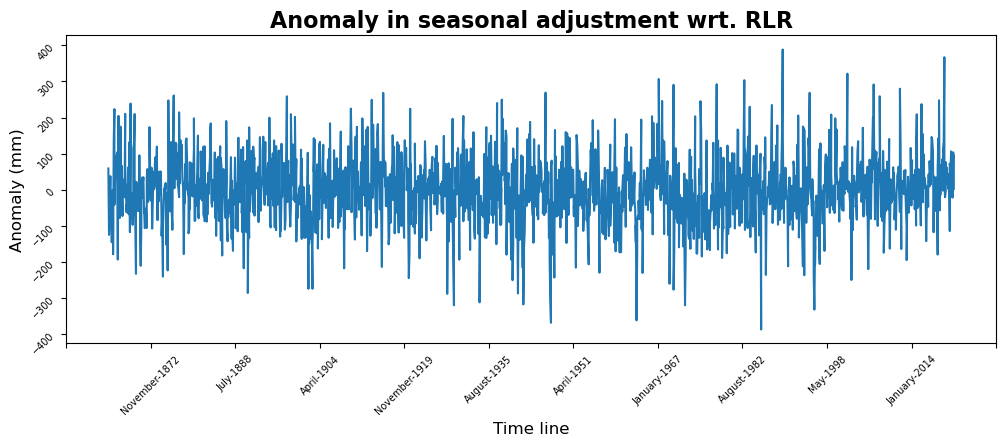

Figure name: 3sigma_rlr


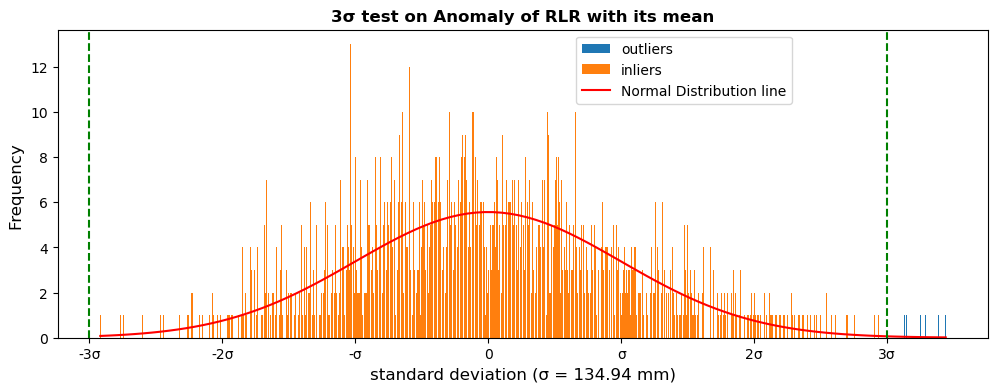

Figure name: 3sigma_adj


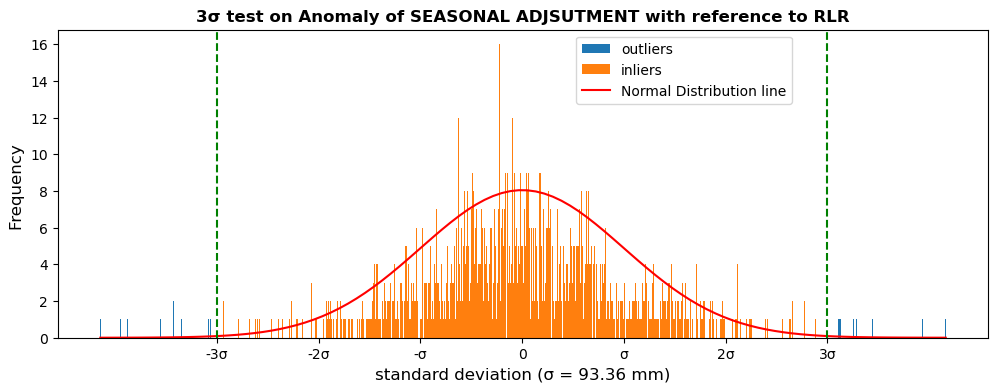

Figure name: 6mad_rlr


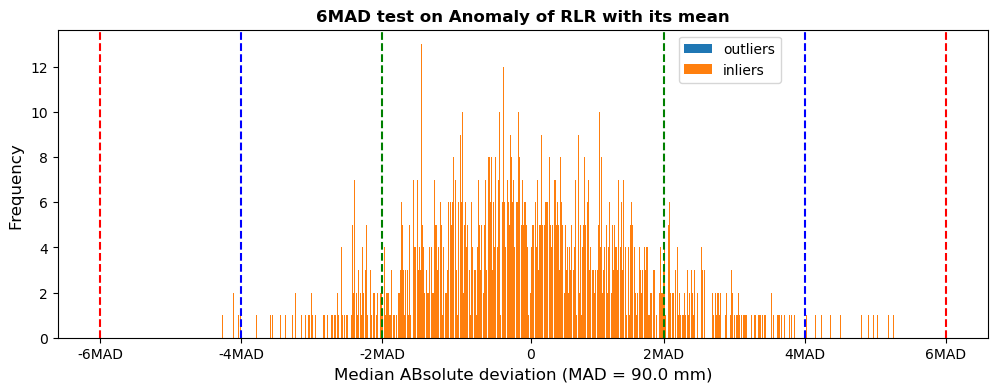

Figure name: 6mad_adj


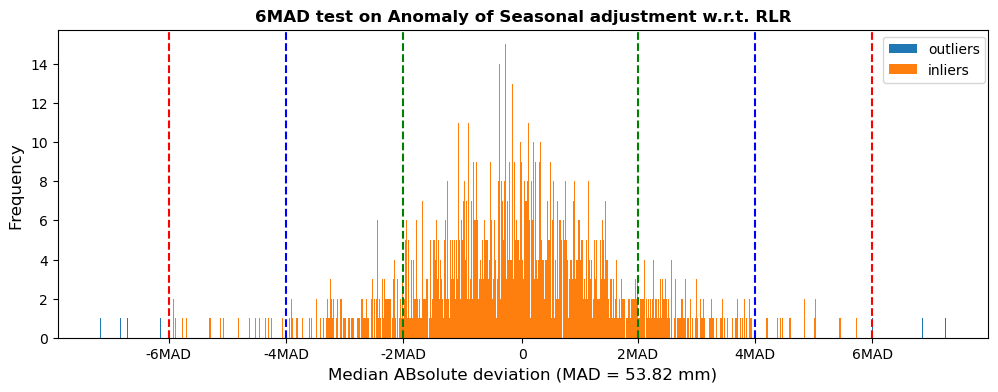

Figure name: trend_rlr


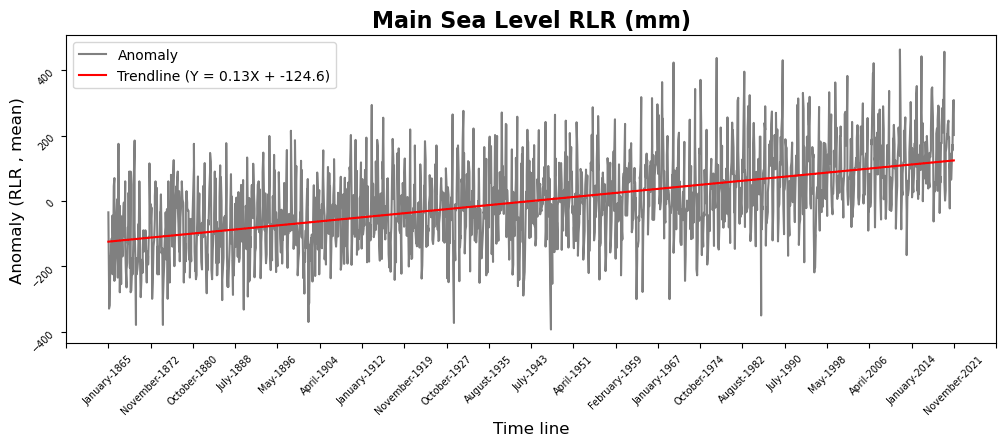

Figure name: trend_adj


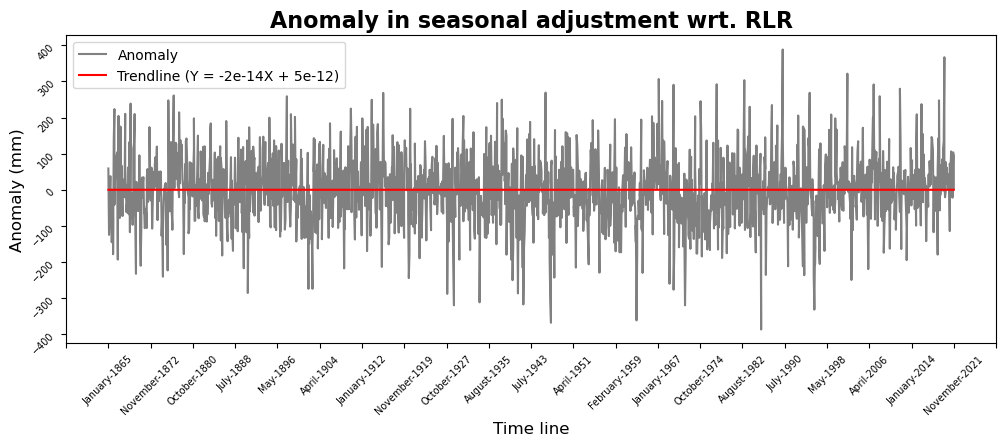

Figure name: histogram


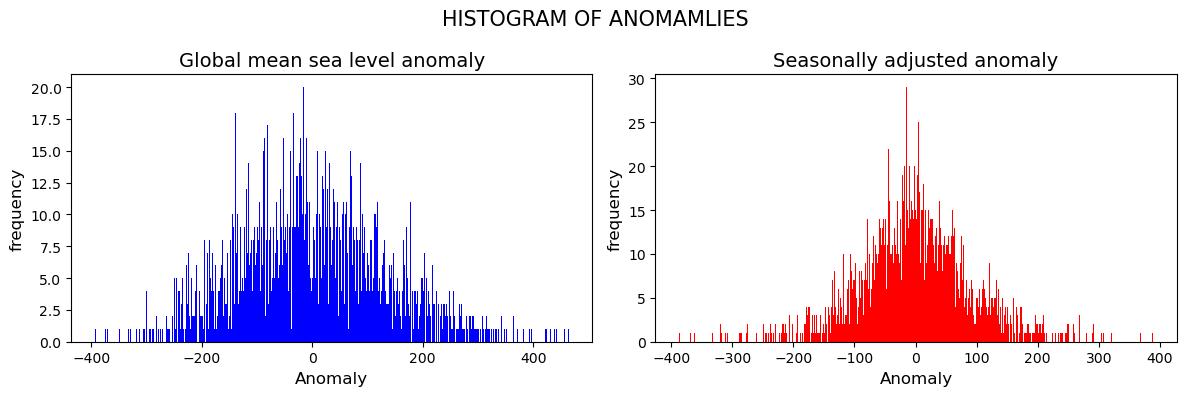

Figure name: bar


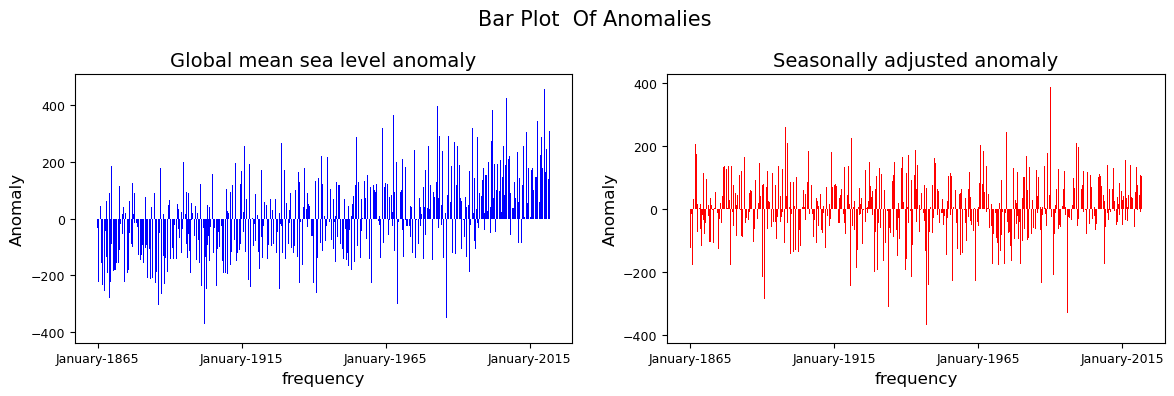

Figure name: violin_plot


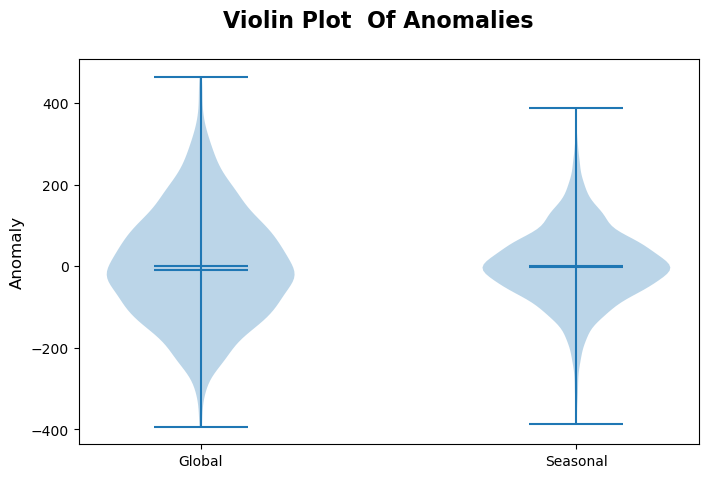

Figure name: trendlines


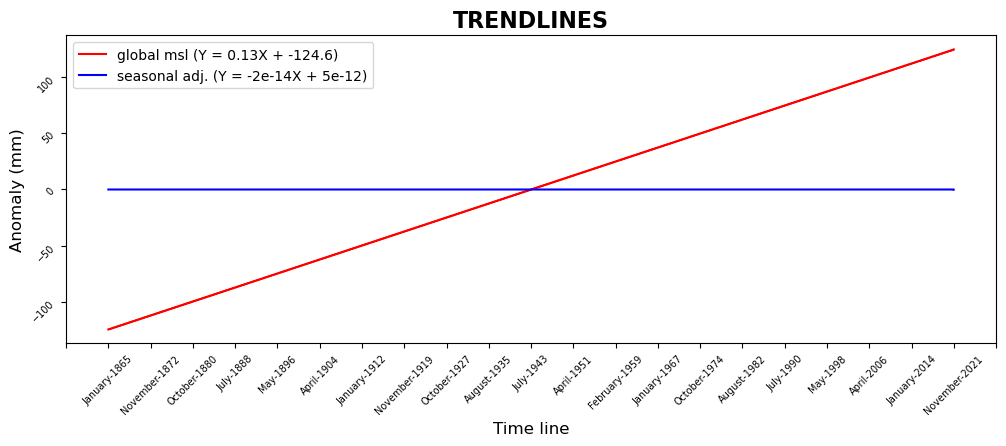

Figure name: moving_avg


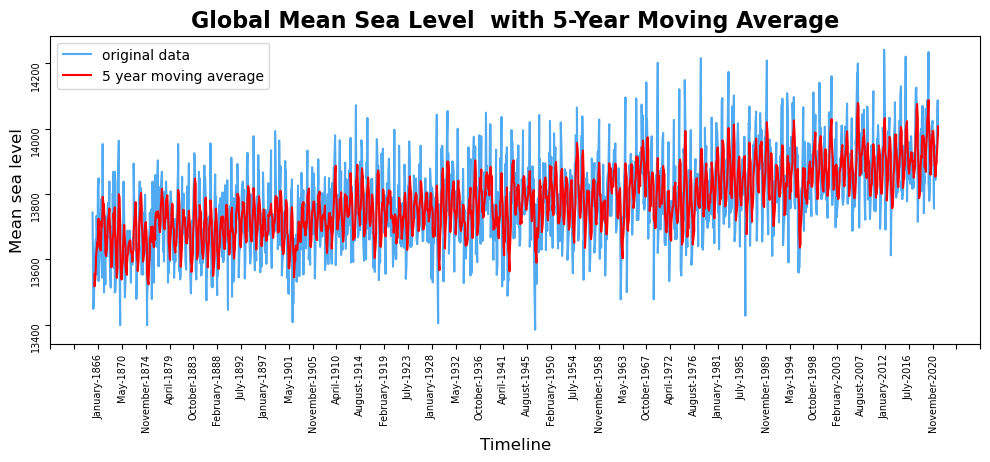

Figure name: lombscargle


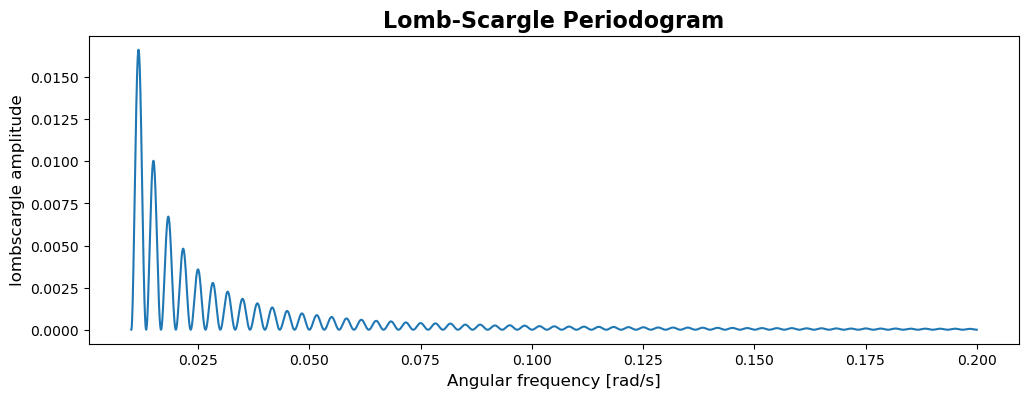

In [342]:
for figure_name, figure in figures.items():
    print("Figure name:", figure_name)
    fig = plt.figure(figures[figure_name])
    plt.savefig(r"C:\Users\Sahil Agrawal\Desktop\sem-2\eg\lab-03\{}.jpg".format(figure_name),dpi =2000, bbox_inches='tight')
    plt.show()
#saving all plots